<a href="https://colab.research.google.com/github/kmcmurphy/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.0 MB/s eta 0:00:00


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import files


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME','STATUS', 'SPECIAL_CONSIDERATIONS'])

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced

application_counts = application_df['APPLICATION_TYPE'].value_counts()

# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts <= 528].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classification_counts = application_df['CLASSIFICATION'].value_counts()

classifications_to_replace = list(classification_counts[classification_counts <= 1883].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     4144
C3000     1918
Name: CLASSIFICATION, dtype: int64

In [7]:
application_df.nunique()

APPLICATION_TYPE       8
AFFILIATION            6
CLASSIFICATION         5
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [8]:
# # Convert the ASK_AMT into six bins

# ask_labels = ["Under 100k", "100-500k", "500k-1m", "Over 1m"]
# cut_points = [0, 100000, 500000, 1000000, 1000000000 ]
# application_df['ASK_BUCKET'] = pd.cut(application_df["ASK_AMT"], cut_points, labels=ask_labels)

# application_df.head()
# application_df['ASK_BUCKET'].value_counts()

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
#categories_encoded = pd.get_dummies(application_df.drop(columns=['ASK_AMT','IS_SUCCESSFUL','SPECIAL_CONSIDERATIONS','STATUS']))

categories_encoded = pd.get_dummies(application_df.drop(columns=['IS_SUCCESSFUL']))



In [10]:
# Concantenate the dummies along with the columns left out

application_df_encoded = pd.concat([application_df['IS_SUCCESSFUL'],categories_encoded],axis=1)

application_df_encoded.head()

,IS_SUCCESSFUL,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,5000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,142590,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = application_df_encoded["IS_SUCCESSFUL"]
X= application_df_encoded.drop(['IS_SUCCESSFUL'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimize the Model


In [ ]:
# # Create a method that creates a new Sequential model with hyperparameter options
# def create_model(hp):
#     nn_model = tf.keras.models.Sequential()
#     features = len(X_train_scaled[0])


#     # Allow kerastuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation',['tanh', 'relu', 'sigmoid'])
    
#     # Allow kerastuner to decide number of neurons in first layer
#     nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#         min_value=100,
#         max_value=100,
#         step=5), activation=activation, input_dim=features))

#     # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
#     for i in range(hp.Int('num_layers', 1, 5)):
#         nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#             min_value=10,
#             max_value=150,
#             step=5),
#             activation=activation))
    
#     nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
#     return nn_model

In [ ]:
# # Import the kerastuner library
# import keras_tuner as kt

# tuner = kt.Hyperband(
#     create_model,
#     objective="accuracy",
#     max_epochs=50,
#     hyperband_iterations=5,
#     overwrite=True)

# # Run the kerastuner search for best hyperparameters
# tuner.search(X_train_scaled,y_train,epochs=4,validation_data=(X_test_scaled,y_test))

In [ ]:
# # Return the top 3 models to test
# top_hyper = tuner.get_best_hyperparameters(3)
# for param in top_hyper:
#   print(param.values)

## Compile, Train and Evaluate Model 1




In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 100
layer2 = 100
layer3 = 75
layer4 = 50
layer5 = 225

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="tanh", input_dim=features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=layer4, activation="tanh"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=layer5, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3900      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 75)                7575      
                                                                 
 dense_3 (Dense)             (None, 50)                3800      
                                                                 
 dense_4 (Dense)             (None, 225)               11475     
                                                                 
 dense_5 (Dense)             (None, 1)                 226       
                                                                 
Total params: 37,076
Trainable params: 37,076
Non-traina

In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 6s 5ms/step - loss: 0.5811 - accuracy: 0.7177
Epoch 2/50
804/804 [==============================] - 5s 6ms/step - loss: 0.5664 - accuracy: 0.7243
Epoch 3/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5622 - accuracy: 0.7248
Epoch 4/50
804/804 [==============================] - 4s 6ms/step - loss: 0.5590 - accuracy: 0.7290
Epoch 5/50
804/804 [==============================] - 5s 7ms/step - loss: 0.5566 - accuracy: 0.7285
Epoch 6/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5560 - accuracy: 0.7299
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5547 - accuracy: 0.7296
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5535 - accuracy: 0.7295
Epoch 9/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5528 - accuracy: 0.7304
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5517 - accuracy: 0.7299

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5619 - accuracy: 0.7271 - 546ms/epoch - 2ms/step
Loss: 0.5619345307350159, Accuracy: 0.7271137237548828


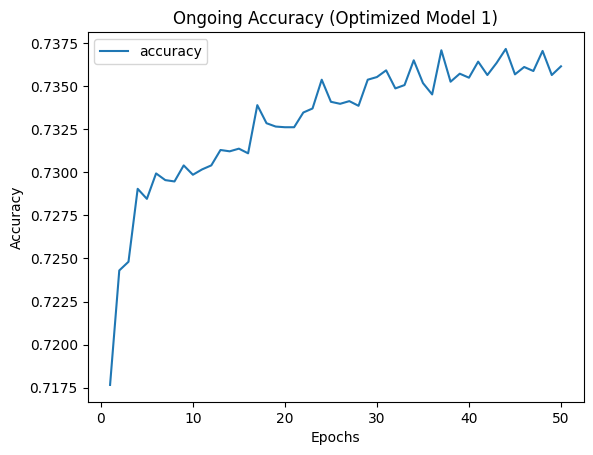

In [17]:
# Plot the ongoing accuracy over the epochs
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epochs', ylabel='Accuracy', y = 'accuracy', title='Ongoing Accuracy (Optimized Model 1)')
fig = plot.get_figure()

## Compile, Train and Evaluate Model 2


In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 100
layer2 = 100
layer3 = 75
layer4 = 50
layer5 = 225

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=layer4, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=layer5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3900      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 75)                7575      
                                                                 
 dense_3 (Dense)             (None, 50)                3800      
                                                                 
 dense_4 (Dense)             (None, 225)               11475     
                                                                 
 dense_5 (Dense)             (None, 1)                 226       
                                                                 
Total params: 37,076
Trainable params: 37,076
Non-traina

In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 5s 4ms/step - loss: 0.5719 - accuracy: 0.7231
Epoch 2/50
804/804 [==============================] - 5s 6ms/step - loss: 0.5607 - accuracy: 0.7297
Epoch 3/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5577 - accuracy: 0.7306
Epoch 4/50
804/804 [==============================] - 4s 6ms/step - loss: 0.5553 - accuracy: 0.7321
Epoch 5/50
804/804 [==============================] - 4s 6ms/step - loss: 0.5552 - accuracy: 0.7318
Epoch 6/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5533 - accuracy: 0.7325
Epoch 7/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5528 - accuracy: 0.7324
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7331
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7331
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5515 - accuracy: 0.7335

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5666 - accuracy: 0.7265 - 510ms/epoch - 2ms/step
Loss: 0.5665615200996399, Accuracy: 0.7265306115150452


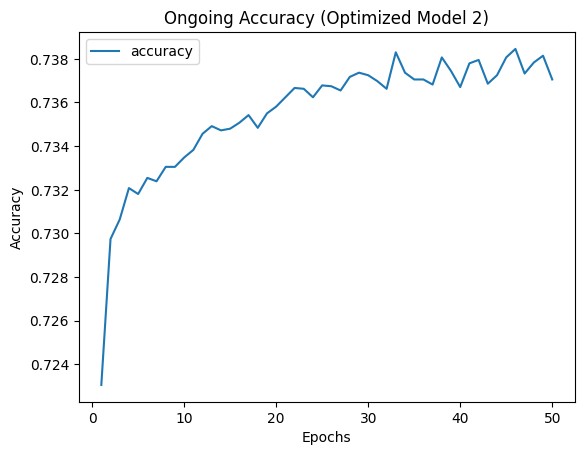

In [17]:
# Plot the ongoing accuracy over the epochs
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epochs', ylabel='Accuracy', y = 'accuracy', title='Ongoing Accuracy (Optimized Model 2)')
fig = plot.get_figure()

## Compile, Train and Evaluate Model 3


In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 100
layer2 = 2000
layer3 = 1000
layer4 = 500
layer5 = 250

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=layer4, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=layer5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3900      
                                                                 
 dense_1 (Dense)             (None, 2000)              202000    
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                                 
Total params: 2,832,901
Trainable params: 2,832,901
Non-

In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 59s 70ms/step - loss: 0.5782 - accuracy: 0.7187
Epoch 2/50
804/804 [==============================] - 45s 56ms/step - loss: 0.5636 - accuracy: 0.7263
Epoch 3/50
804/804 [==============================] - 46s 57ms/step - loss: 0.5597 - accuracy: 0.7256
Epoch 4/50
804/804 [==============================] - 43s 54ms/step - loss: 0.5587 - accuracy: 0.7280
Epoch 5/50
804/804 [==============================] - 42s 52ms/step - loss: 0.5560 - accuracy: 0.7278
Epoch 6/50
804/804 [==============================] - 39s 48ms/step - loss: 0.5549 - accuracy: 0.7292
Epoch 7/50
804/804 [==============================] - 40s 49ms/step - loss: 0.5547 - accuracy: 0.7289
Epoch 8/50
804/804 [==============================] - 41s 51ms/step - loss: 0.5540 - accuracy: 0.7300
Epoch 9/50
804/804 [==============================] - 43s 54ms/step - loss: 0.5516 - accuracy: 0.7303
Epoch 10/50
804/804 [==============================] - 42s 53ms/step - loss: 0.553

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.6197 - accuracy: 0.7313 - 2s/epoch - 9ms/step
Loss: 0.619715690612793, Accuracy: 0.7313119769096375


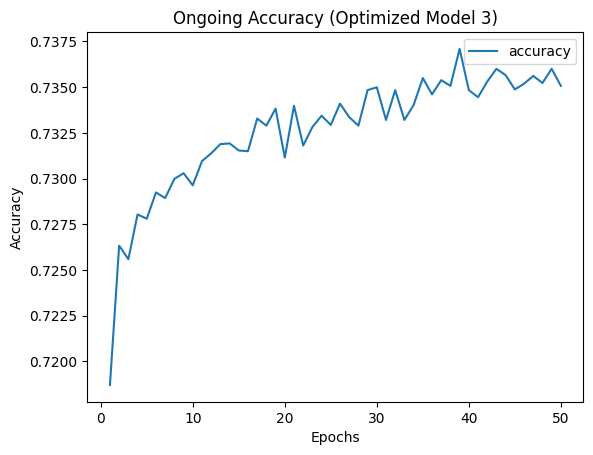

In [17]:
# Plot the ongoing accuracy over the epochs
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epochs', ylabel='Accuracy', y = 'accuracy', title='Ongoing Accuracy (Optimized Model 3)')
fig = plot.get_figure()